In [1]:
# Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Setup and imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

# Sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

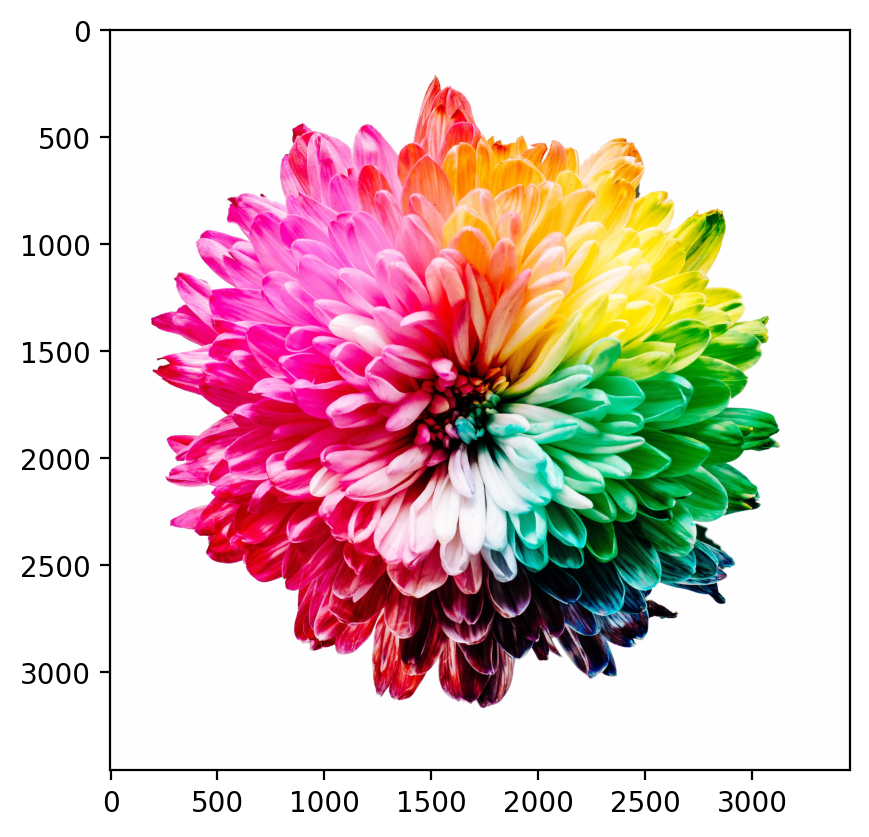

In [22]:
img = plt.imread('test.jpg')
plt.imshow(img)

In [23]:
img.shape

(3456, 3456, 3)

In [24]:
img_flat = img.reshape(-1,3)

In [25]:
pd.DataFrame(img_flat)

,0,1,2
0,254,254,254
1,254,254,254
2,254,254,254
3,254,254,254
4,254,254,254
...,...,...,...
11943931,254,254,254
11943932,254,254,254
11943933,254,254,254
11943934,254,254,254


In [26]:
img_flat.shape

(11943936, 3)

In [27]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [28]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(img_flat)

In [29]:
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

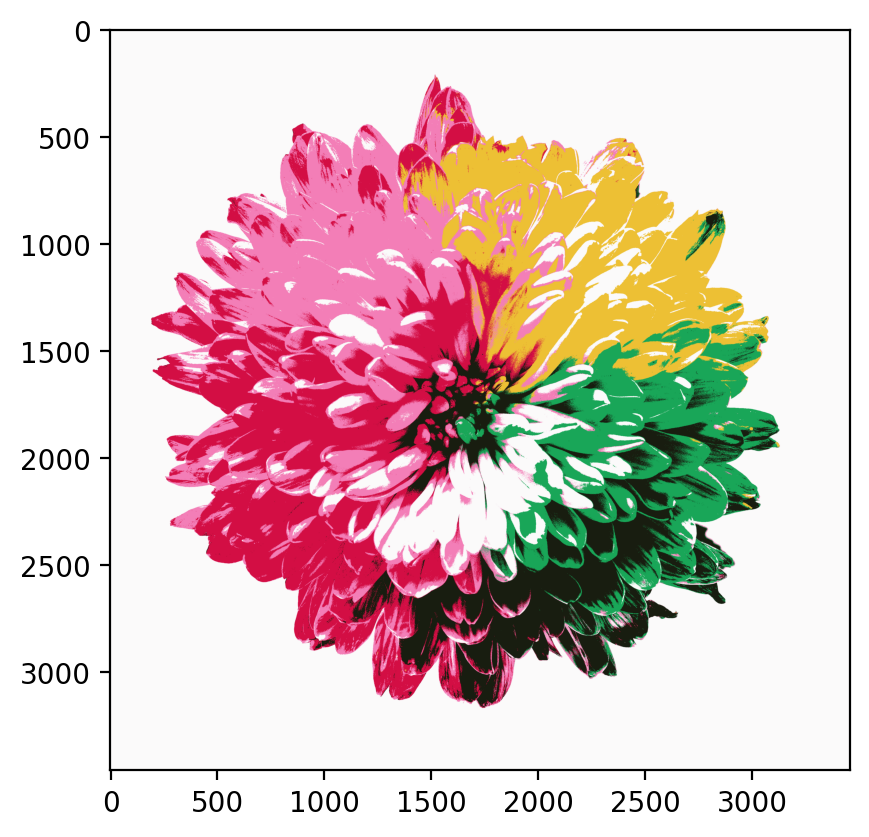

In [30]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)

In [31]:
img_flat.shape

(11943936, 3)

In [34]:
### BEGIN SOLUTION
def image_cluster(img, k):
    img_flat = img.reshape(-1,3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_
### END SOLUTION

In [36]:
### BEGIN SOLUTION
k_vals = list(range(2,21,3))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img3, ine = image_cluster(img,k)
    img_list.append(img3)
    inertia.append(ine)  

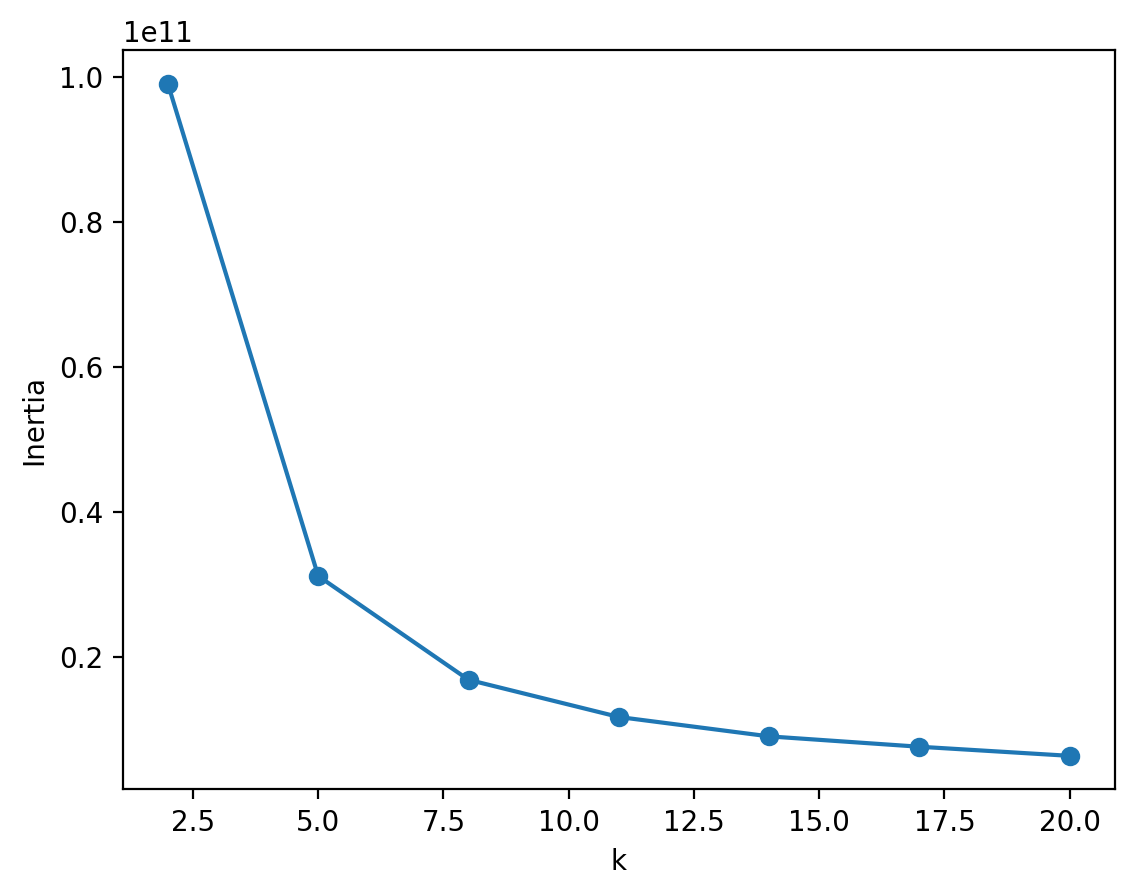

In [37]:
# Plot to find optimal number of clusters
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');
### END SOLUTION

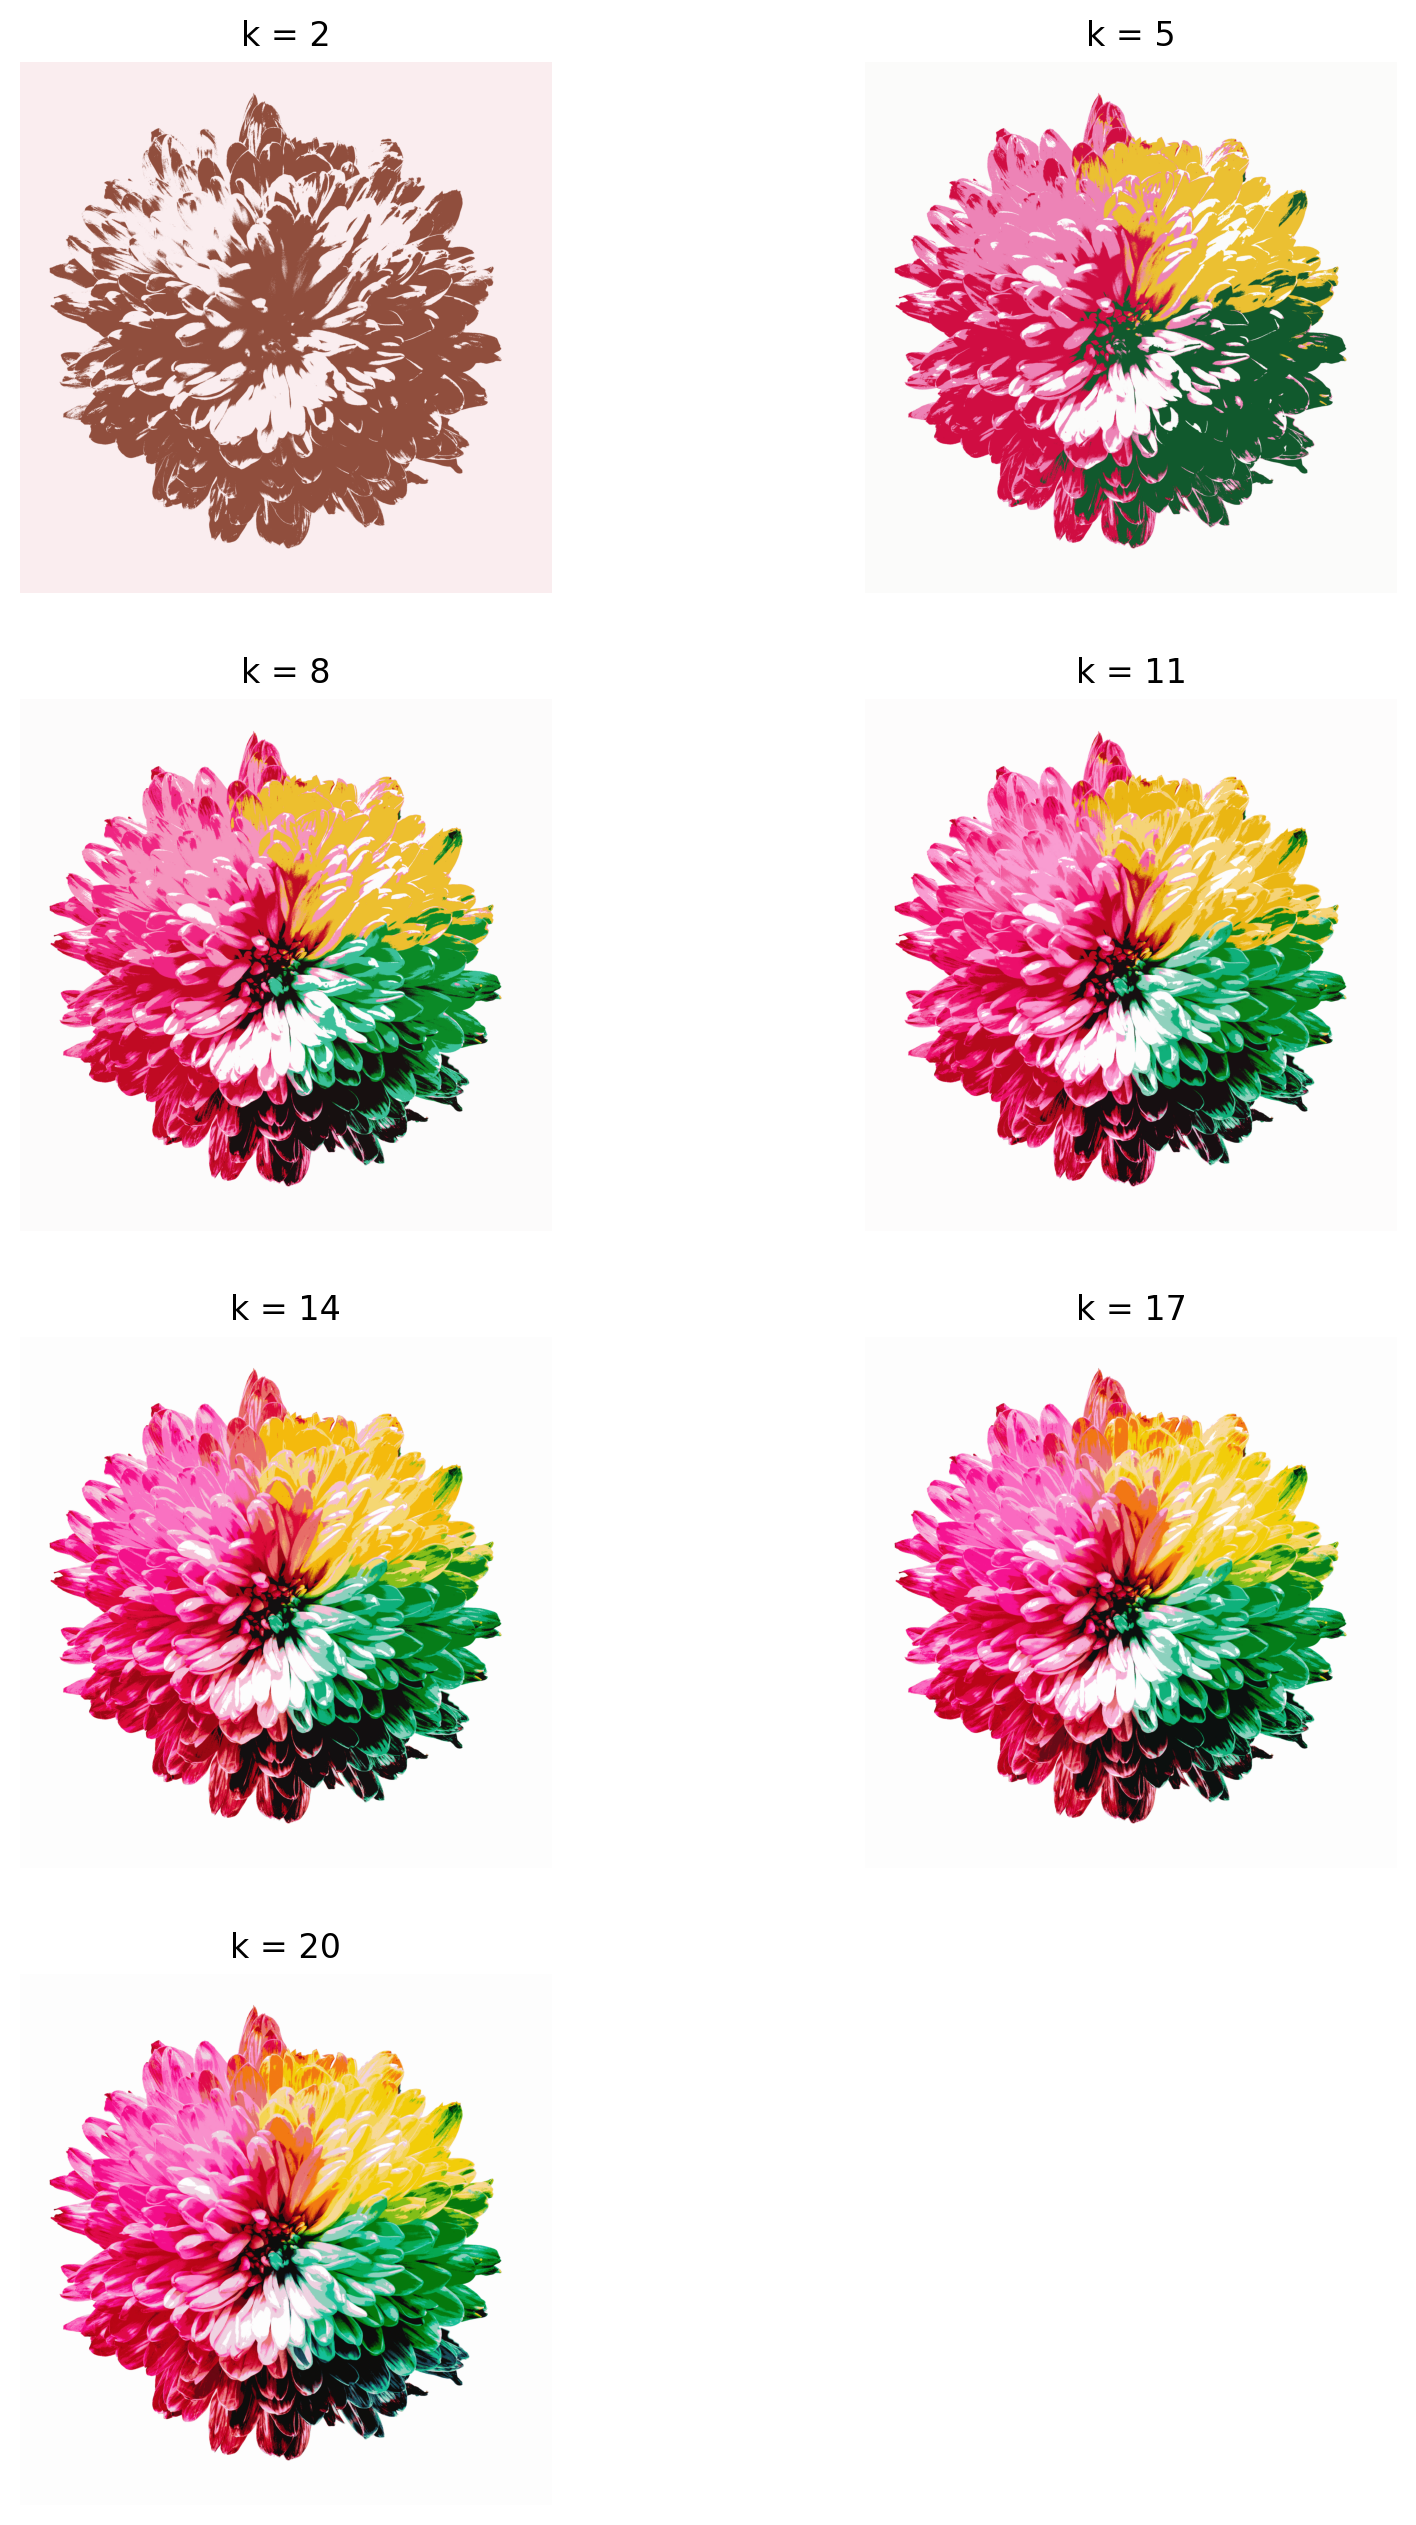

In [38]:
### BEGIN SOLUTION
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');
### END SOLUTION